# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [783]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings and do not display them

In [784]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc = {'figure.figsize':(15,8)})

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)

In [785]:
# Connecting to google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [786]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [787]:
# Viewing the first 5 rows of the data frame
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [788]:
# Viewing the last 5 rows of the data frame
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [789]:
# View the shape of data
df.shape

(3454, 15)

#### Observations:


*   There are 3454 rows and 15 columns in the data.





In [790]:
# Viewing the info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

#### Observations:
*   The release_year and days_used columns are of int64 data type. There are four object type columns and the rest are all floats.
*   From the non-null count, we can see that some columns have missing values as their total count does not total up to the total number of rows in the data frame

In [791]:
# checking for the total number of null values in each column
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

#### Observations:


*   main_camera_mp column has the most missing values that total up to 179.
*   int_memory and ram have the same missing number of missing values
*   The target variable does not have missing values which is a good thing. Meaning we shall not lose any data by dropping the columns.

In [792]:
# creating a copy of the data so that original data remains unchanged
data = df.copy()

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

In [793]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [794]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**1. Normalized Used Price**

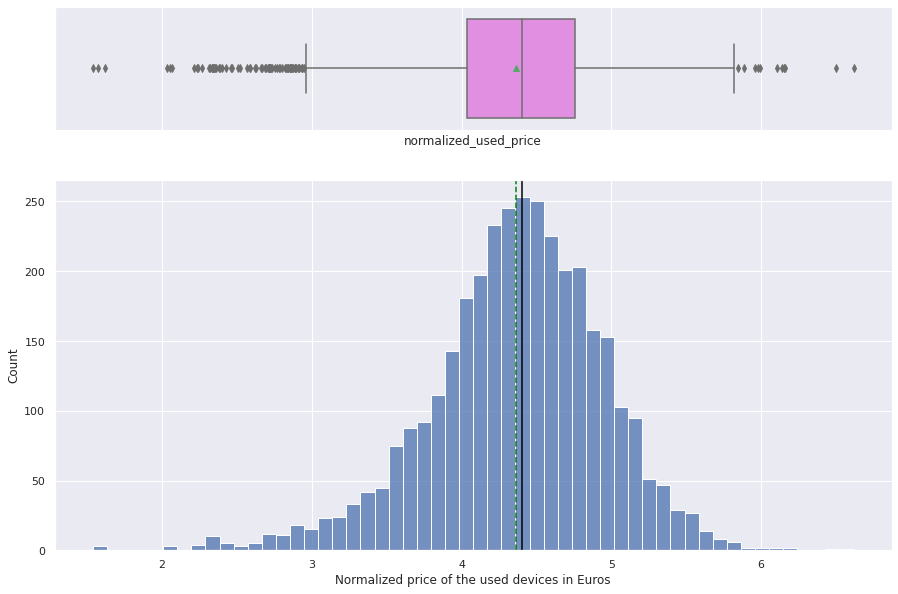

In [795]:
histogram_boxplot(data,"normalized_used_price")
plt.xlabel("Normalized price of the used devices in Euros");

#### Observations:


*   The price of used phones approximately follows a normal distribution
*   From the box plot we can see that there are outliers



**2. Normalized price of New devices**

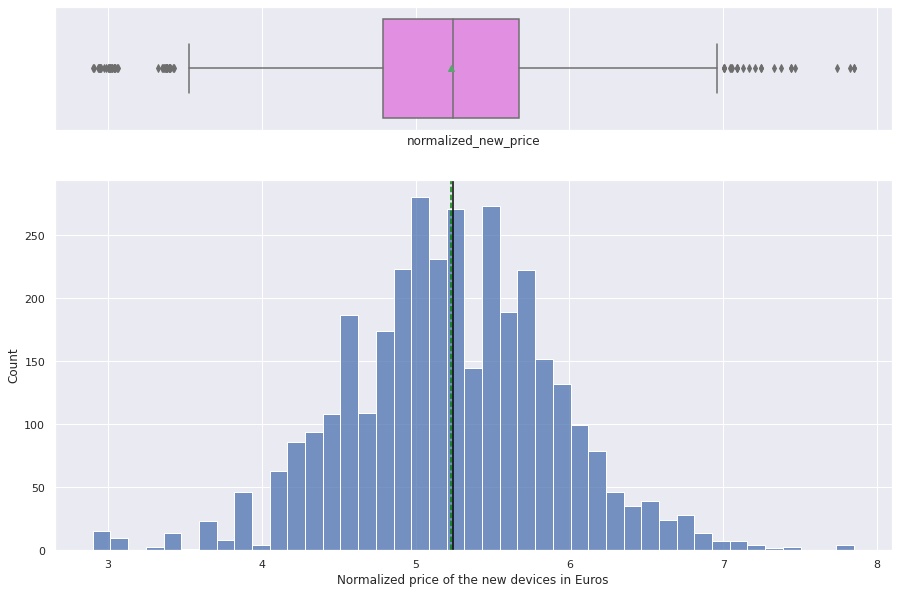

In [796]:
histogram_boxplot(data,"normalized_new_price")
plt.xlabel("Normalized price of the new devices in Euros");

#### Observations:

*   The prices of used phones are kind of normally distributed

**3. Main camera pixels of the devices**

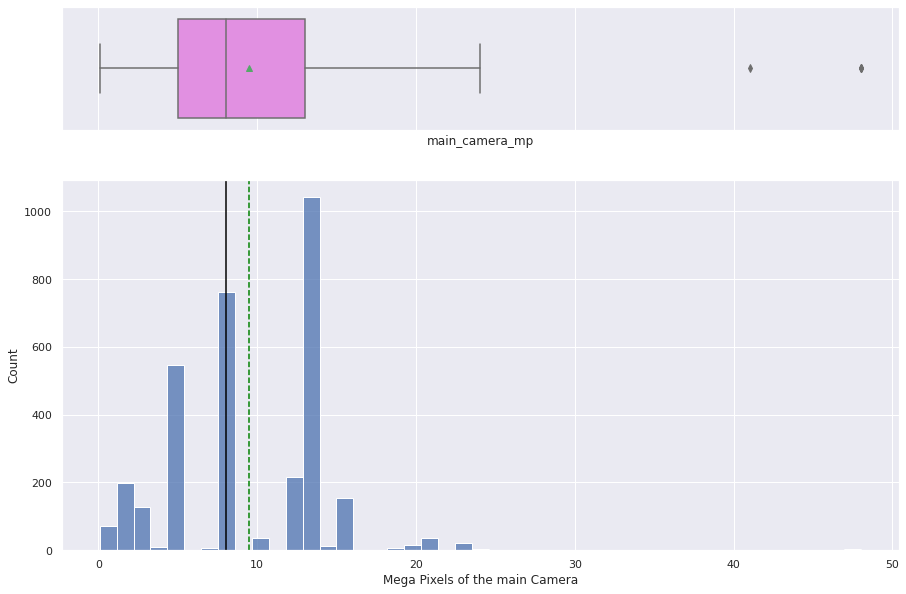

In [797]:
histogram_boxplot(data,"main_camera_mp")
plt.xlabel("Mega Pixels of the main Camera");

#### Observations:

*   The main camera pixels are kind of normally distributed.

**4. Selfie Camera resolution**



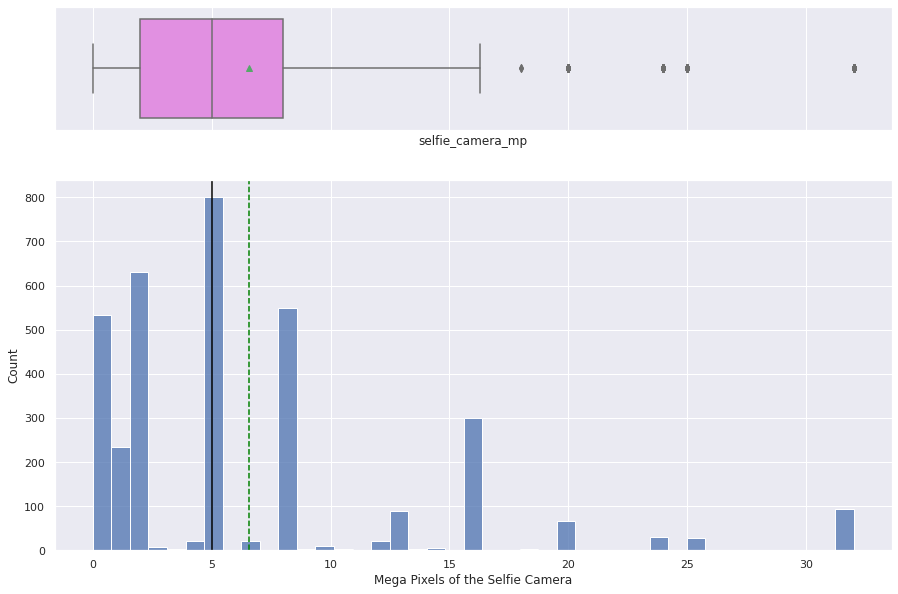

In [798]:
histogram_boxplot(data,"selfie_camera_mp")
plt.xlabel("Mega Pixels of the Selfie Camera");

#### Observations:

*   The distribution of selfie camera pixels of the devices is right skewed.

**5. Days used**

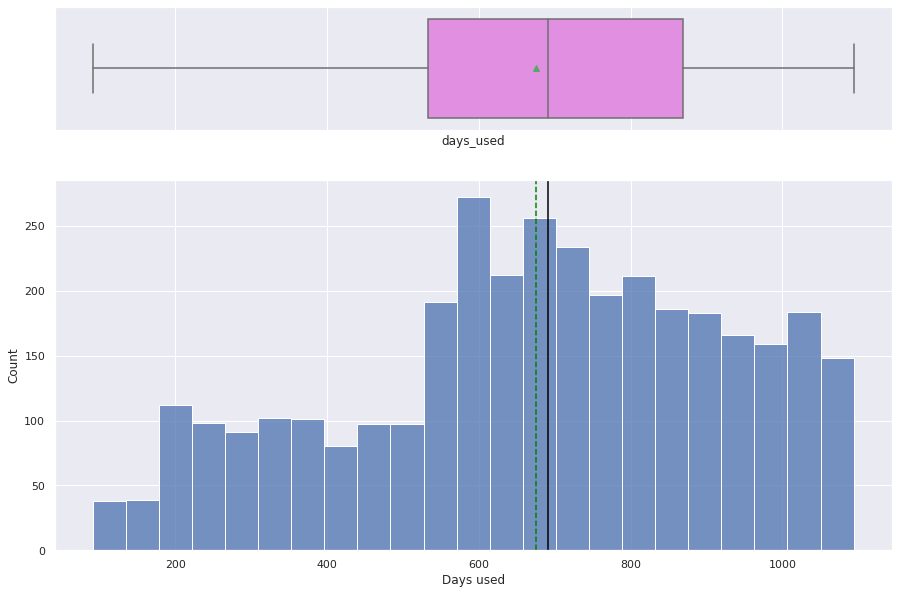

In [799]:
histogram_boxplot(data,"days_used")
plt.xlabel("Days used");

#### Observations:

*   The days used are approximately normally distributed.

**6. Weight of the devices**

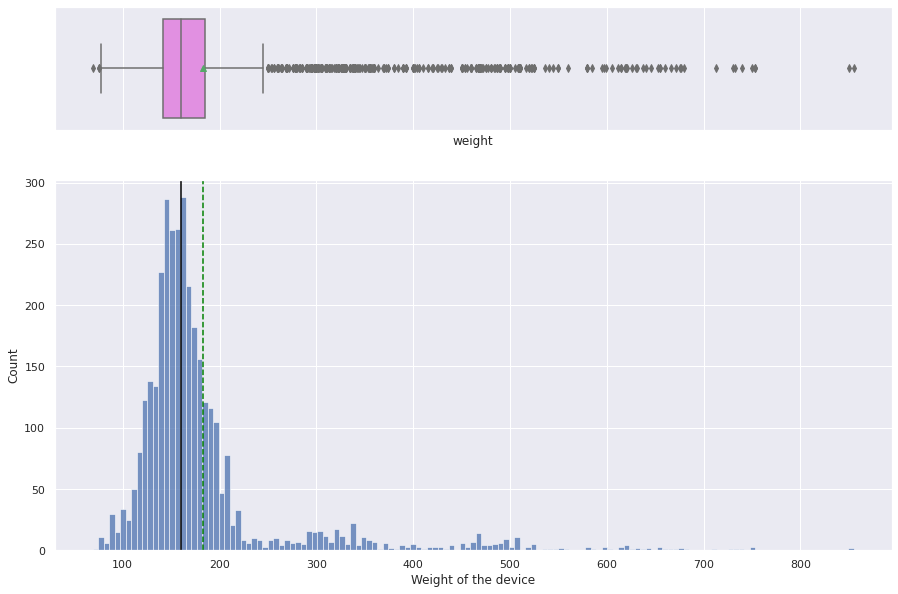

In [800]:
histogram_boxplot(data,"weight")
plt.xlabel("Weight of the device");

#### Observations:

*   The weight column heavily right skewed.
*   During data pre processing for model building, we can perform a log transformation on this column to reduce the skewness.

**7. Battery**

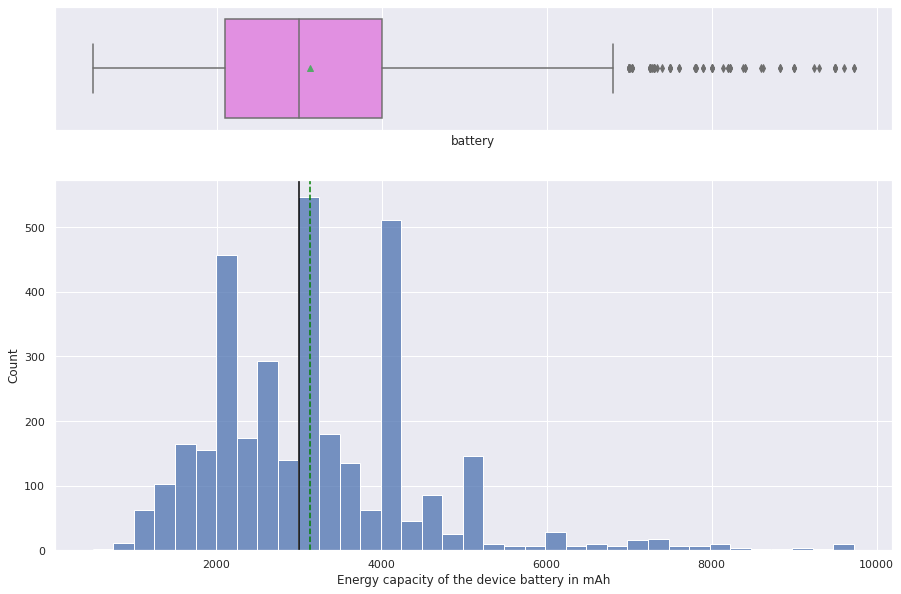

In [801]:
histogram_boxplot(data,"battery")
plt.xlabel("Energy capacity of the device battery in mAh");

#### Obsrrvations:


*   There is right-skewness in the battery column

**8. Device Screen size**

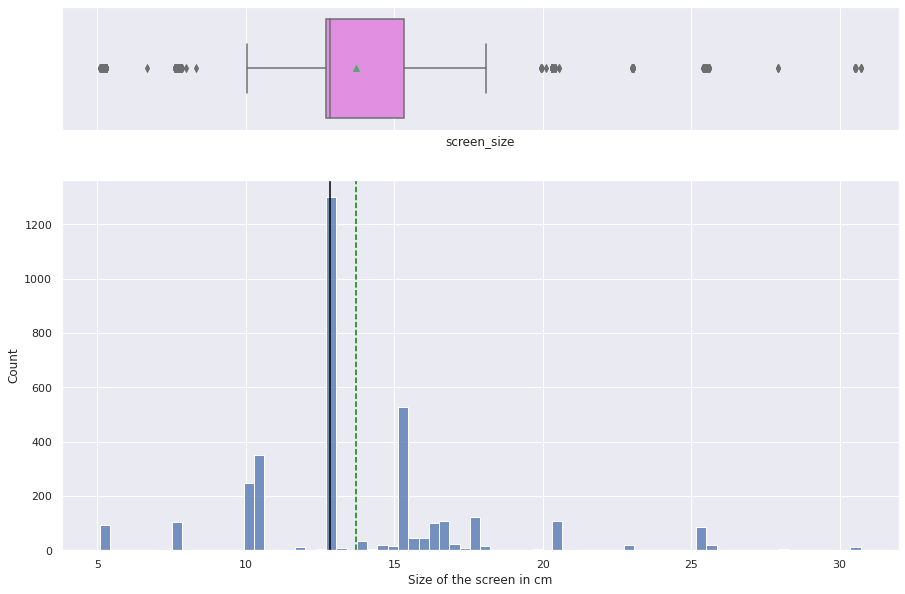

In [802]:
histogram_boxplot(data,"screen_size")
plt.xlabel("Size of the screen in cm");

#### Observations:

*   The distribution of screen size of the devices is approximately normal.

**9. Brand Name**

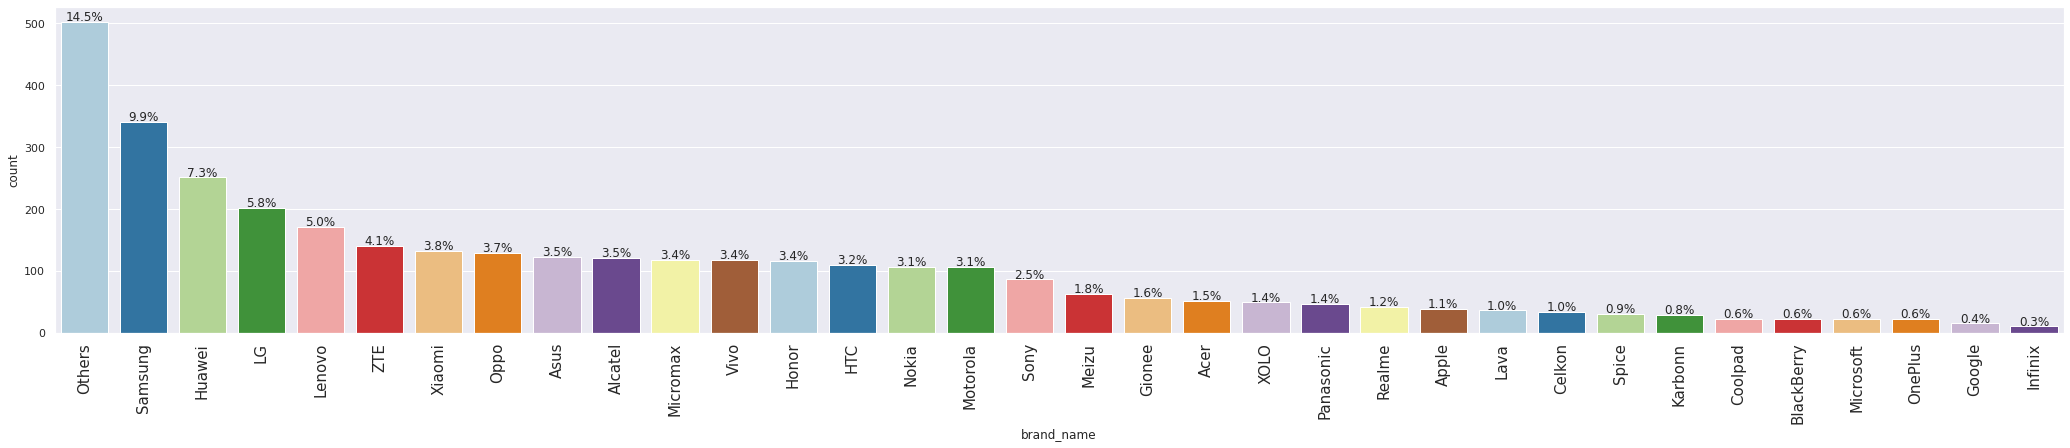

In [803]:
labeled_barplot(data, "brand_name", perc=True,);

#### Observations:

*   Most of the brand names were not given and they fall under the category of others
*   Samsung has a higher percentage compared to others. This means customers mostly buy refurbished samsung phones.

**10. Operating System**

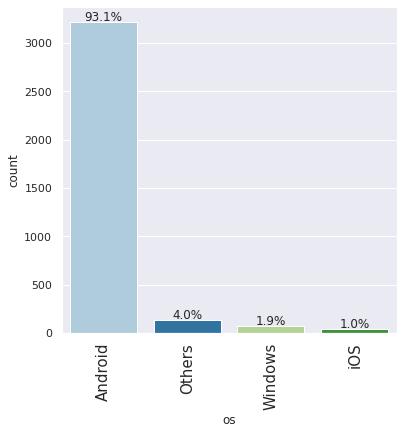

In [804]:
labeled_barplot(data, "os", perc=True,)

#### Observations:

*   Android devices are the most refurbished ones with a 93.1% in the refurbished market
*   iOS devices are the least refurbished ones with a percentage of 1.0% in the refurbished market

**11. Release Year**

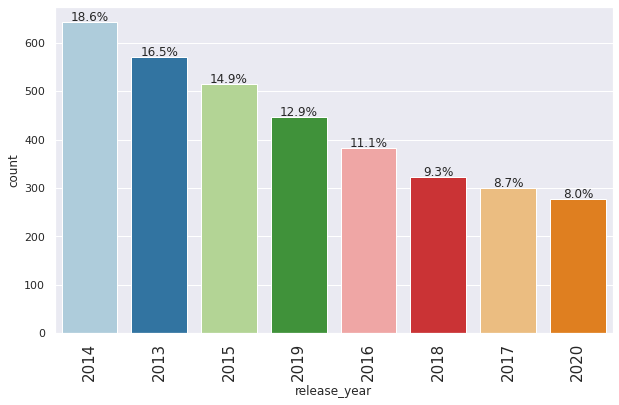

In [805]:
labeled_barplot(data, "release_year", perc=True);

#### Observations:

*    Devices released in 2014 were the most refurbished ones.

**12. 4G And 5G devices**

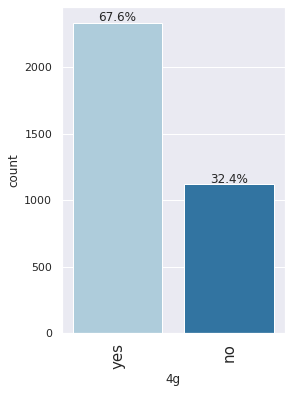

In [806]:
labeled_barplot(data, "4g", perc=True);

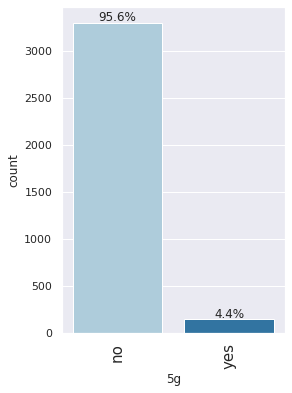

In [807]:
labeled_barplot(data, "5g", perc=True);

#### Observations:

*   Alot of 4G devices were refurbished as compared to 5G

### **Bivariate Analysis**

**Correlation heatmap**

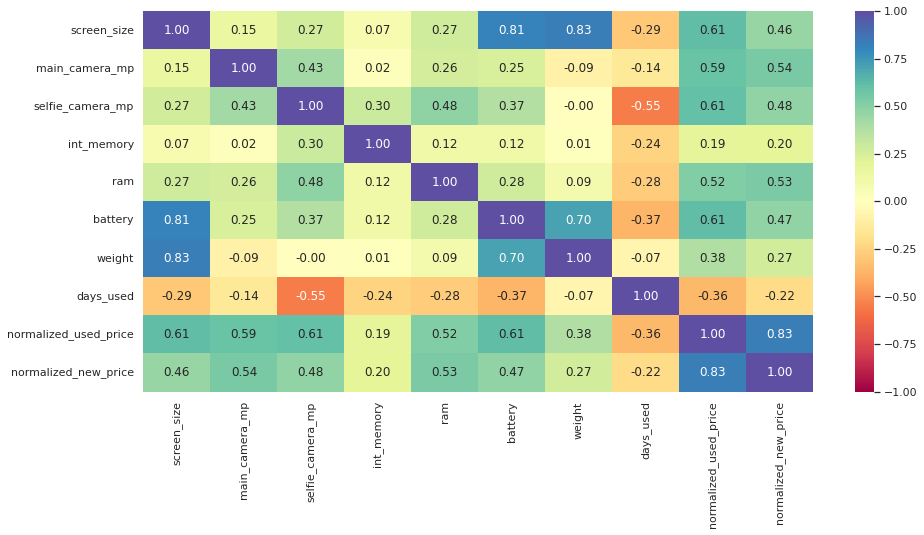

In [808]:
# creating a list of numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("release_year")  # dropping the release_year column as it is temporal variable

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
);

#### Observations:

*   Battery and screen size are highly correlated
*   Weight and screen size are highly correlated
*   Normalized new price and Normalized used price also show high correlation
*   There is a negative correlation between days_used and selfie camera
*   There is a negative correlation between days_used and normalized used price

**The more RAM the device has, the faster the devices. Let us see which brands give more RAM to its devices.**

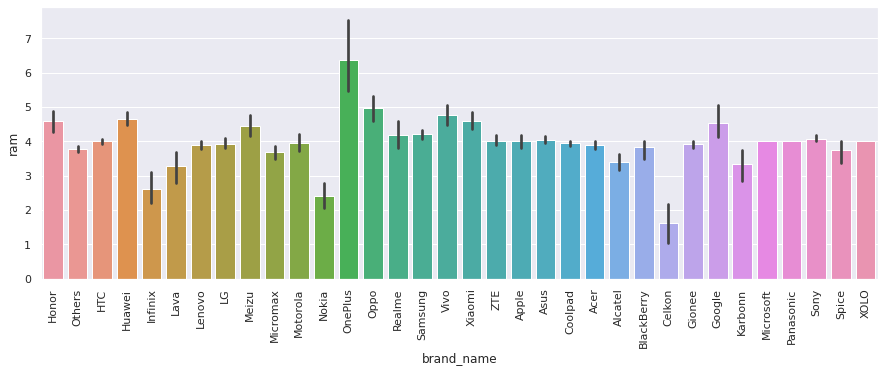

In [809]:
plt.figure(figsize=(15, 5))
sns.barplot(x="brand_name", y="ram", data=data)
plt.xticks(rotation=90);

#### Observations:

*   OnePlus brand gives more RAM to the devices.

**OS vs RAM**

*   Let us see which Operating System offers the most RAM

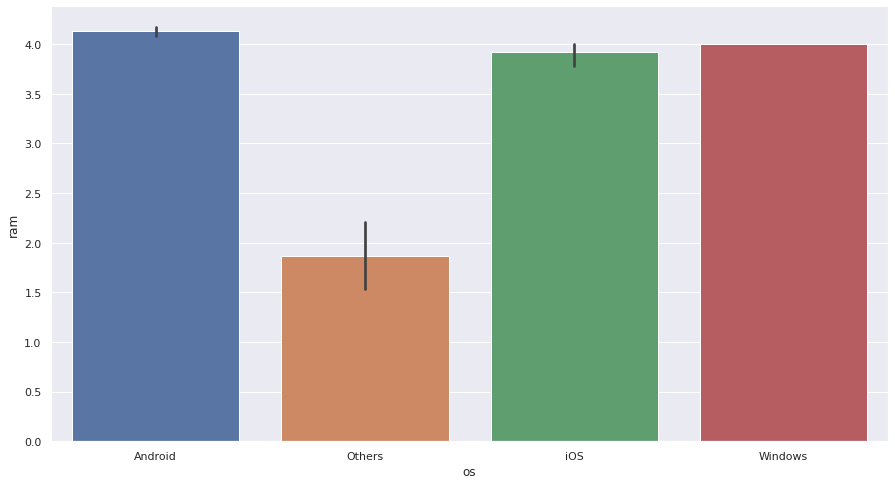

In [810]:
sns.barplot(x="os", y="ram", data=data);

#### Observations:

*   Android offers the most RAM.

**Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. Let us check how many phones and tablets are available across different brands and os with a screen size larger than 6 inches.**

In [811]:
# create a dataframe for devices with screensize larger than 6 inches
df_large_screen = data[data.screen_size > 6 * 2.54] # 1 inch = 2.54 centimetres
df_large_screen.shape

(1099, 15)

In [812]:
df_large_screen["brand_name"].value_counts().head()

Huawei     149
Samsung    119
Others      99
Vivo        80
Honor       72
Name: brand_name, dtype: int64

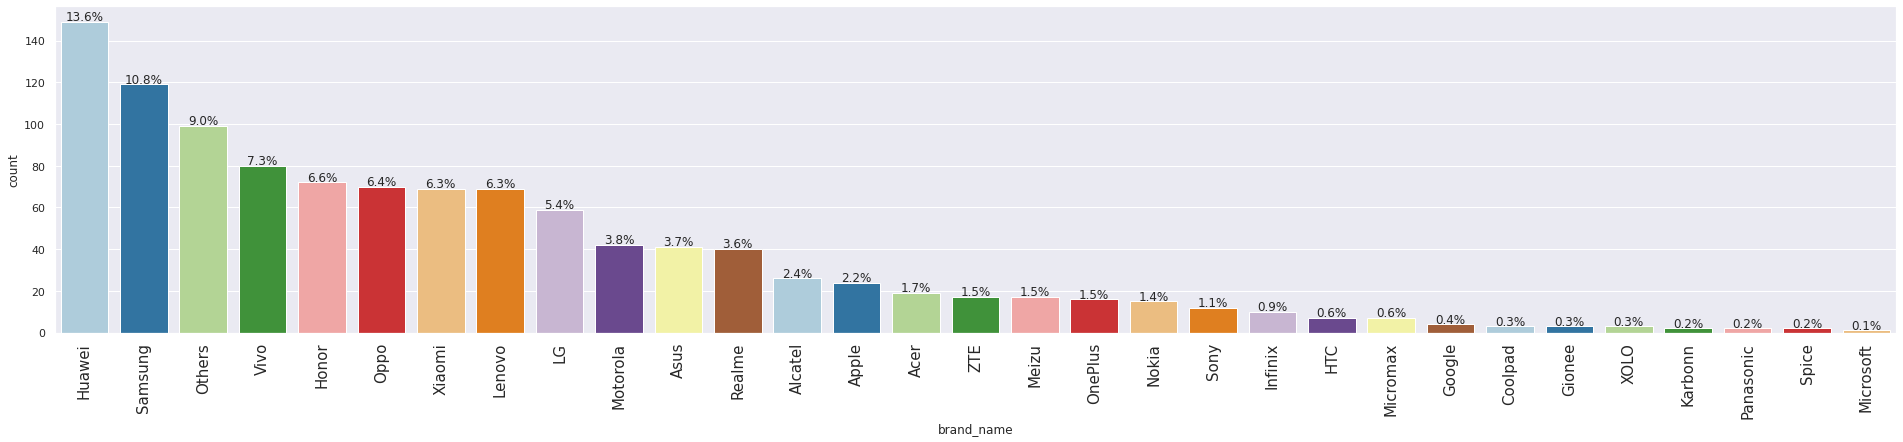

In [813]:
labeled_barplot(df_large_screen, "brand_name", perc=True);

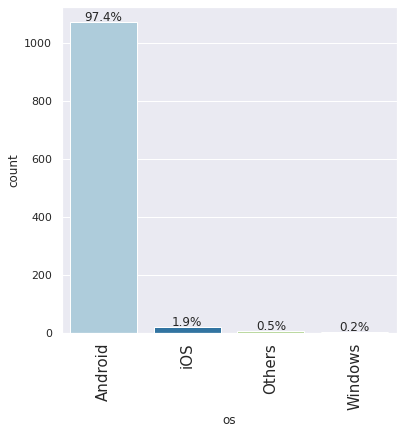

In [814]:
labeled_barplot(df_large_screen, "os", perc=True);

#### Observations:

*   Huawei brand name has the highest percentage of devices with a screen size larger than 6 inches
*   Android offer a large screen > 6 inches size for most of their devices as seen from the bar plot above

**Most people prefer batteries that last long. Let us see how battery varies accros different brands and operating systems**

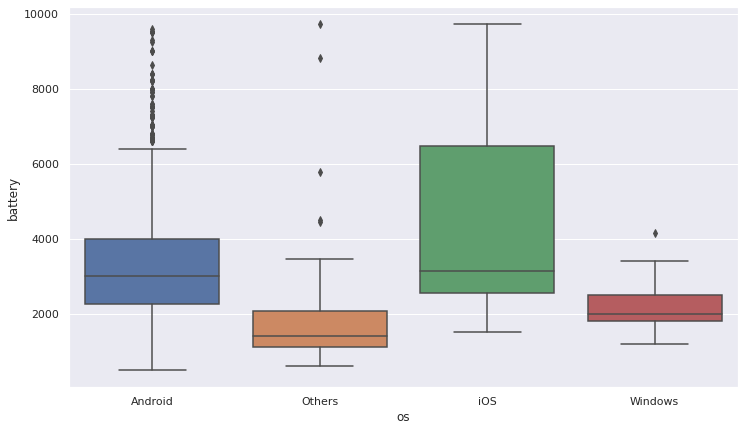

In [815]:
# os vs battery
sns.set(rc = {'figure.figsize':(12,7)}) # set figure size
sns.boxplot(x="os", y="battery", data=data);

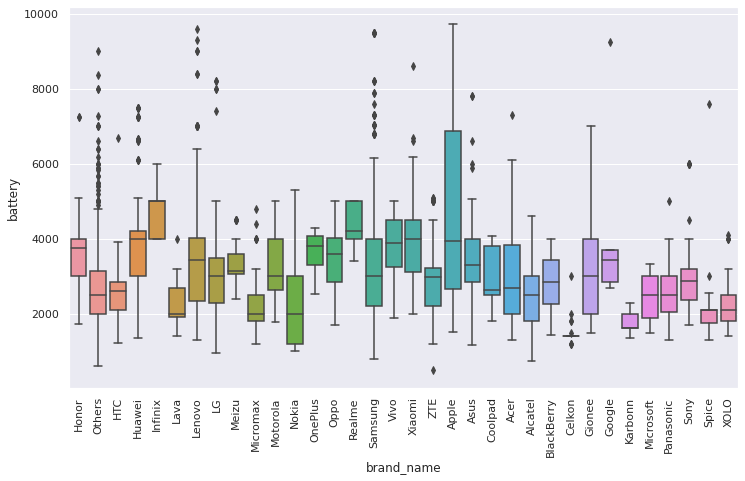

In [816]:
# brand name vs battery
sns.boxplot(x="brand_name", y="battery", data=data)
plt.xticks(rotation=90);

#### Observations:

*   Apple brand offers most of its devices with a large Energy capacity of the device battery in mAh.

**Normalized used price vs Operating system**

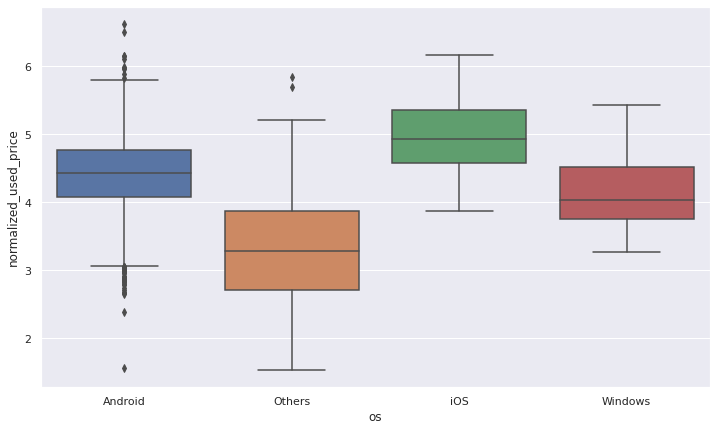

In [817]:
sns.boxplot(x="os", y="normalized_used_price", data=data);

#### Observations:

*    Normalized used price is higher for iOS devices.

**Normalized new price vs Operating system**

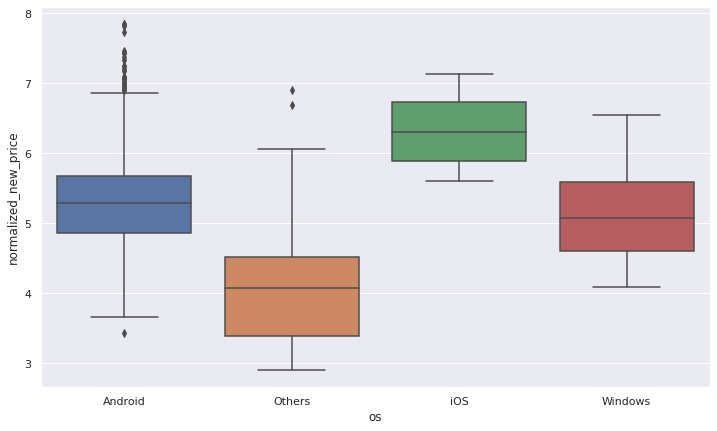

In [818]:
sns.boxplot(x="os", y="normalized_new_price", data=data);

#### Observations:

*   Normalized new price is higher for iOS devices.

**Weight vs battery**



*   A large battery often increases a device's weight, making it feel uncomfortable in the hands.
*   Let us see how weight varies for phones and tablets offering large batteries (more than 4500 mAh)?


In [819]:
data_large_battery = data[data.battery > 4500]
data_large_battery.shape

(341, 15)

In [820]:
data_large_battery["brand_name"].value_counts()

Samsung      50
Others       41
Huawei       37
Xiaomi       31
Lenovo       28
Asus         22
Apple        17
Honor        14
Motorola     14
Vivo         13
LG           12
Realme       12
Gionee       10
ZTE          10
Acer          7
Infinix       6
Sony          6
Oppo          4
Alcatel       1
Google        1
HTC           1
Micromax      1
Nokia         1
Panasonic     1
Spice         1
Name: brand_name, dtype: int64

In [821]:
data_large_battery["os"].value_counts()

Android    324
iOS         14
Others       3
Name: os, dtype: int64

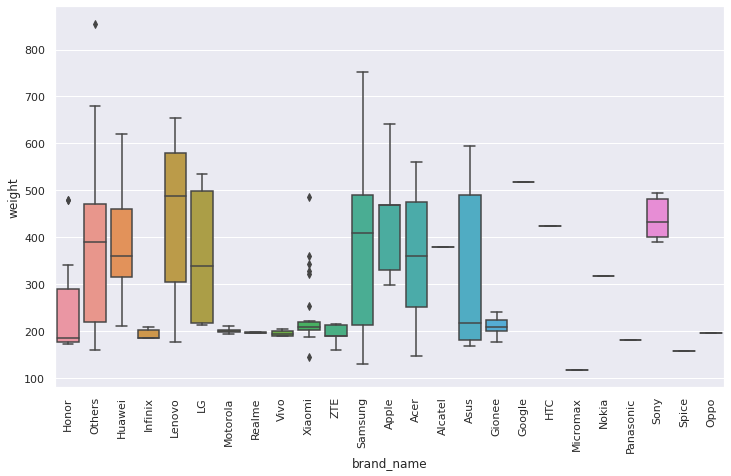

In [822]:
sns.boxplot(x="brand_name", y ="weight", data=data_large_battery)
plt.xticks(rotation=90);

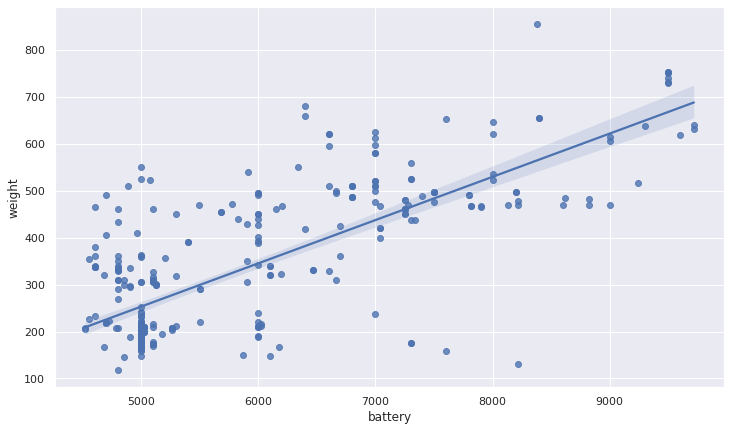

In [823]:
sns.regplot(x="battery", y ="weight", data=data_large_battery);

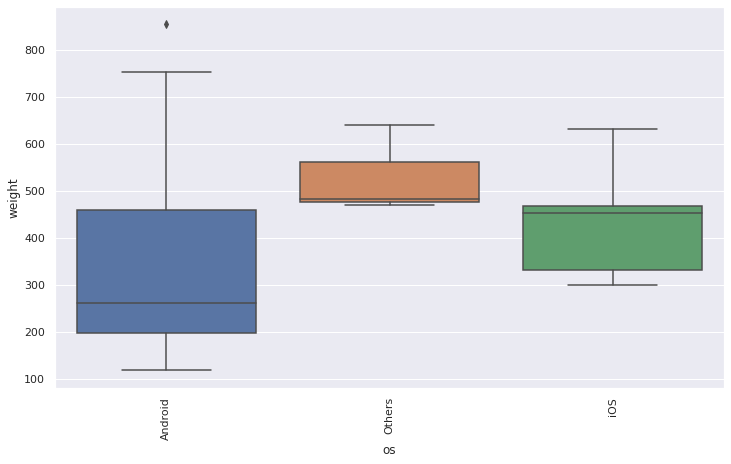

In [824]:
# weight vs os
sns.boxplot(x="os", y ="weight", data=data_large_battery)
plt.xticks(rotation=90);

#### Observations:

*   The Samsung brand gives most of its devices large batteries of more than 4500 mAh. This means samsung phones are heavier as compared to other brands.
*   Phones with large batteries of more than 4500 mAh most fall under the Android OS category. This means that Android phones are generally more heavier.
*   As battery capacity increases weight increase

**A lot of devices nowadays offer great rear cameras, allowing us to capture our favorite moments with loved ones. Let us take a look at the distribution of devices offering greater than or equal to 13MP main cameras across brands**

In [825]:
df_main_camera_pixels = data[data["main_camera_mp"] > 13 ]
df_main_camera_pixels.shape

(267, 15)

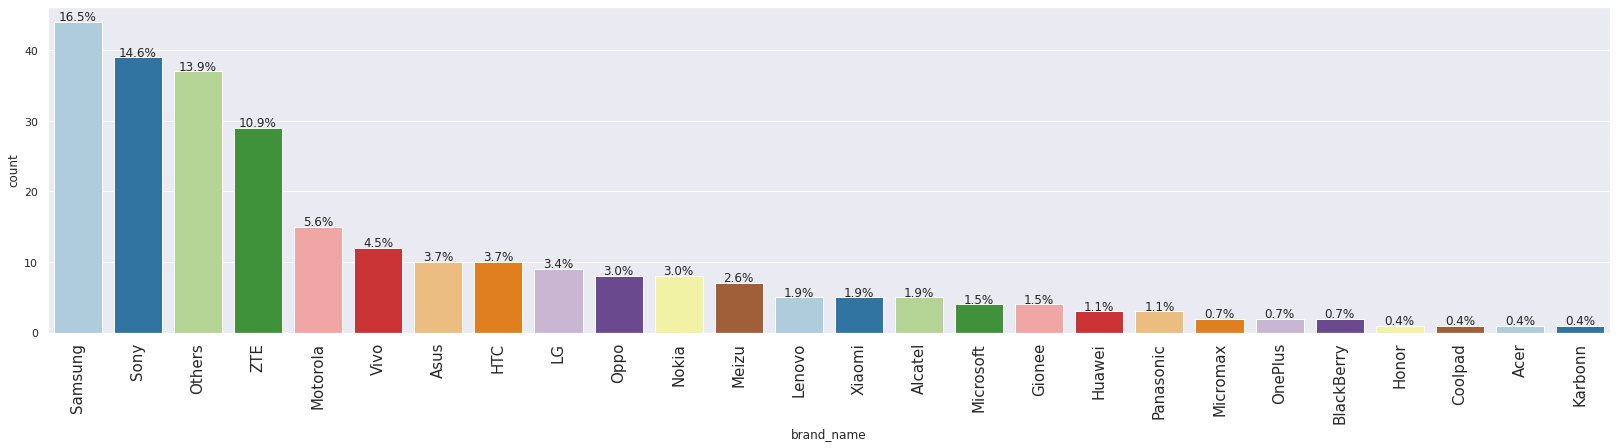

In [826]:
labeled_barplot(df_main_camera_pixels, "brand_name", perc=True);

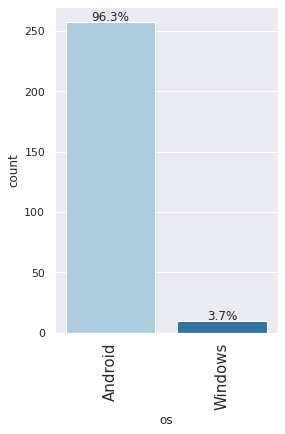

In [827]:
labeled_barplot(df_main_camera_pixels, "os", perc=True);

#### Observations:

*   Samsung devices have the biggest count when it comes to main camera pixels greater than 13
*   Android has the biggest percentage of devices with main camera mega pixels greater than 13

**Let us take a look at how the dependent variable varies with the main camera mega pixels vs devices operating sysytem**

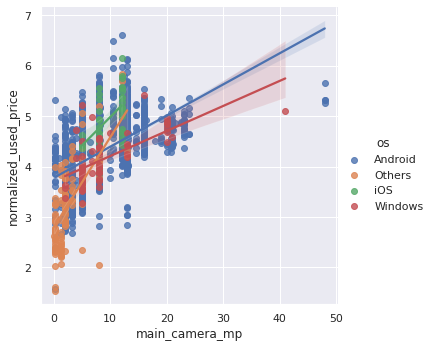

In [828]:
sns.lmplot(x = 'main_camera_mp', y = 'normalized_used_price', data = data, hue = 'os');

**A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. Let us take a look at the distribution of devices offering greater than 8MP selfie cameras across brands.**

In [829]:
df_selfie_camera_pixels = data[data["selfie_camera_mp"] > 8]
df_selfie_camera_pixels.shape

(655, 15)

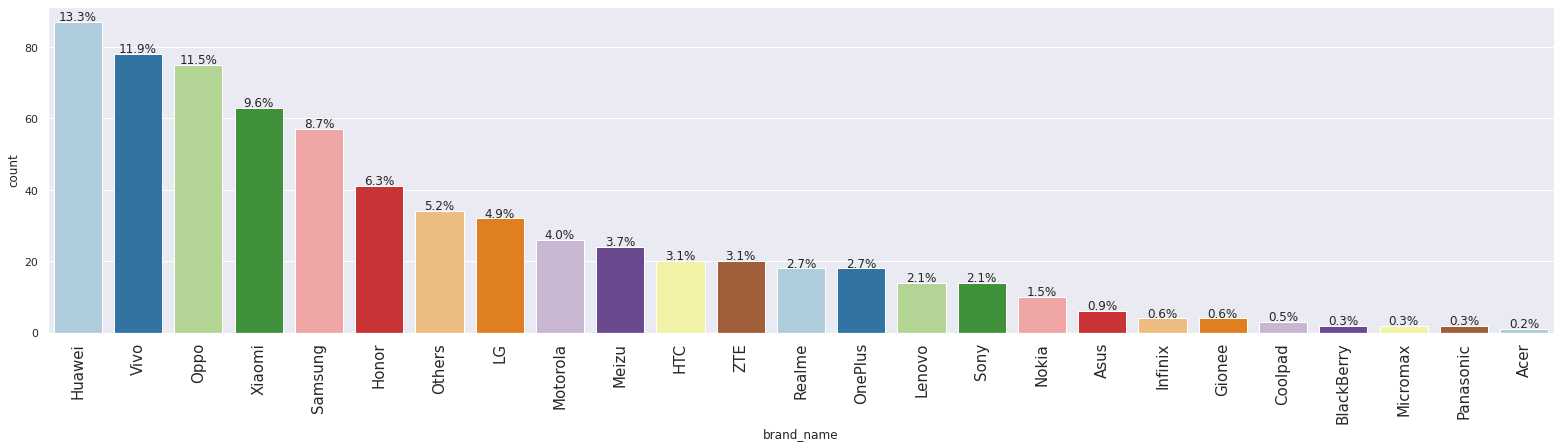

In [830]:
# selfie_camera_mp vs brand_name
labeled_barplot(df_selfie_camera_pixels, "brand_name", perc=True);

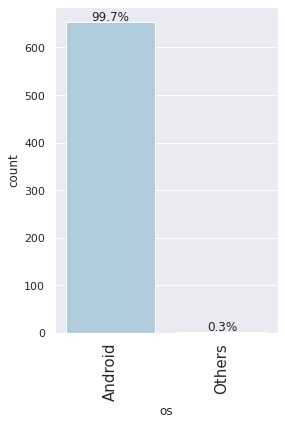

In [831]:
# selfie_camera_mp vs os
labeled_barplot(df_selfie_camera_pixels, "os", perc=True);

In [832]:
df_selfie_camera_pixels["os"].value_counts()

Android    653
Others       2
Name: os, dtype: int64

#### Observations:

*   Android offers the greatest number of devices with selfie camera mega pixels greter than 8. This could probably be one of the reasons they have the biggest number in the market of refurbished devices
*   Huawei devices are the ones with the greatest count with selfie camera mega pixels greater than 8
*   iOS devices don't offer selfie camera mega pixels greater than 8

**Selfie camera mega pixels vs normalized used price vs OS**

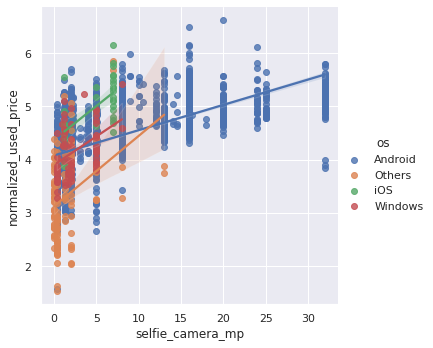

In [833]:
sns.lmplot(x = 'selfie_camera_mp', y = 'normalized_used_price', data = data, hue = 'os');

**Let us take a look at how normalized used price of the devices has a correlation with other attributes of the table**

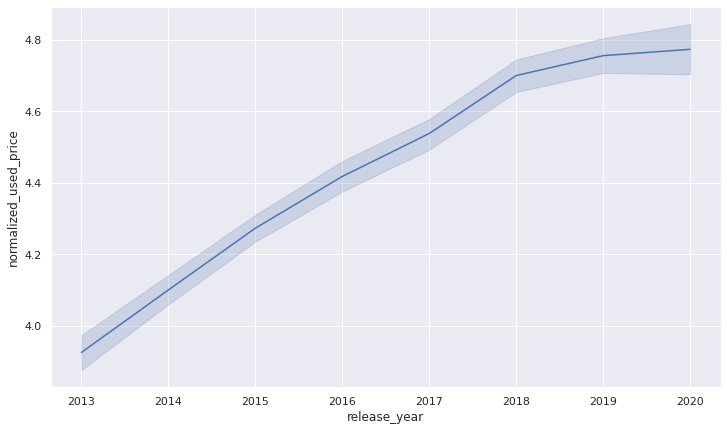

In [834]:
sns.lineplot(x="release_year", y="normalized_used_price", data=data);

#### Observations:

*   The price of refurbished phones keeps increasing over years. The newer the release year the higher the price.

In [835]:
df.corr()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,0.364223,-0.291723,0.614785,0.460889
main_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,0.353728,-0.144672,0.587302,0.541655
selfie_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,0.690942,-0.552636,0.608074,0.475479
int_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,0.235429,-0.242712,0.190993,0.195992
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,0.314203,-0.280066,0.520289,0.532056
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,0.488660,-0.370895,0.613619,0.470754
weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,0.071290,-0.067470,0.382354,0.269540
release_year,0.364223,0.353728,0.690942,0.235429,0.314203,0.488660,0.071290,1.000000,-0.750390,0.509790,0.303689
days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,-0.750390,1.000000,-0.358264,-0.216625
normalized_used_price,0.614785,0.587302,0.608074,0.190993,0.520289,0.613619,0.382354,0.509790,-0.358264,1.000000,0.834496


#### Observations:


*   Normalised used price has a high correlation with screen size, main camera mp, selfie camera mp, ram and battery as seen from the table above.



## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

# **Data Preprocessing**

## **Missing Value Treatment**

In [836]:
# creating a copy of the data frame
df1 = data.copy()

In [837]:
# let us looking at missing values in the dataframe again
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

*   Let us impute missing values in the columns with median of the columns grouped by release year and brand name

In [838]:
cols_to_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_to_impute:
    df1[col] = df1.groupby([ "brand_name", "release_year"])[col].transform(
        lambda x: x.fillna(x.median())
    ) 

In [839]:
# check if there are still missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

*   There are still have missing values missng values.
*   Let us impute these missing values with median of the columns grouped by just brand name

In [840]:
cols_to_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_to_impute:
    df1[col] = df1.groupby('brand_name')[col].transform(
        lambda x: x.fillna(x.median())
    )

In [841]:
# re-check missing values
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

*   main_camera_mp still has 10 missing values
*   Let us go ahead and impute these missing values with the median of the column(main_camera_mp)

In [842]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

In [843]:
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

*   We have no more missing values

## **Log Transformation**

In [844]:
# perform log transformation on the weight column and create a new column called *weight_log*
df1["weight_log"] = np.log(df1["weight"])
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,weight_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356


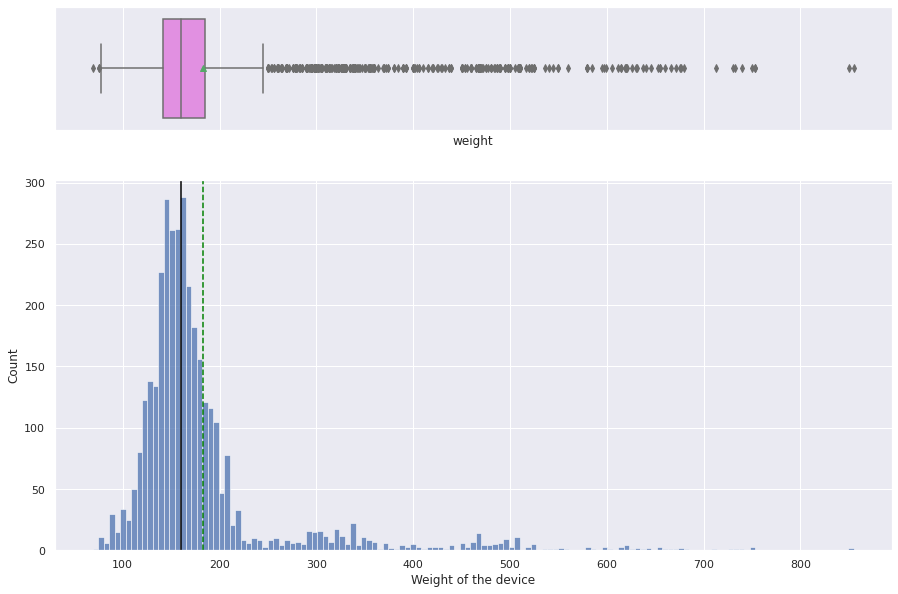

In [845]:
# weight column distribution before log transformation
histogram_boxplot(data,"weight")
plt.xlabel("Weight of the device");

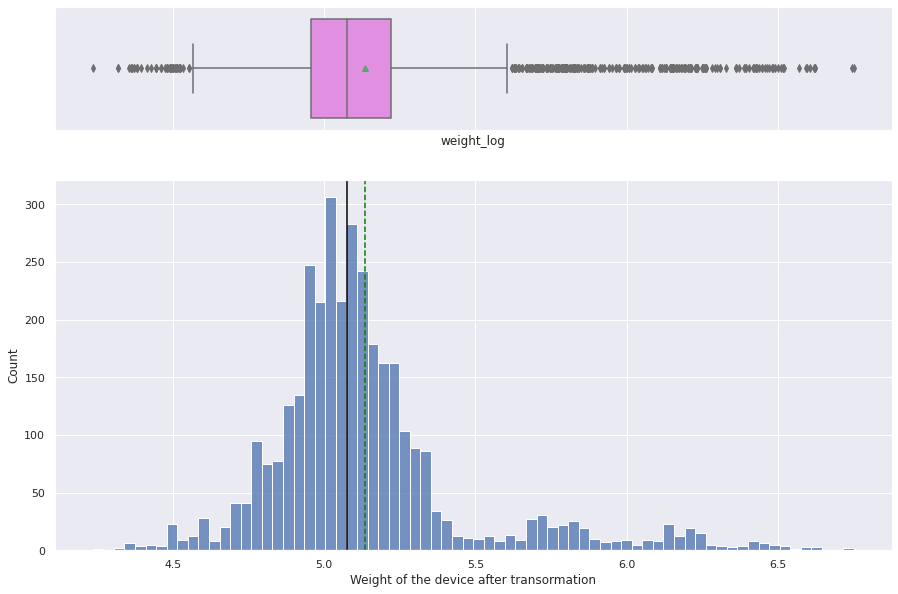

In [846]:
# weight column distribution after log transformation
histogram_boxplot(df1,"weight_log")
plt.xlabel("Weight of the device after transormation");

#### Observations:

*   The weight column distribution after log transformation behaves better as compared to before
*   We will go ahead and drop the weight column and leave the weight_log column

In [847]:
# drop weight column
df1.drop(["weight"], axis=1, inplace=True)

## **Feature Engineering**

*    Let's create a new column years_since_release from the release_year column.
*    We will consider the year of data collection, 2021, as the baseline as it was the year this data was collected
*    We will drop the release_year column.

In [848]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace = True) # drop release_year column
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

### **Outlier Check**


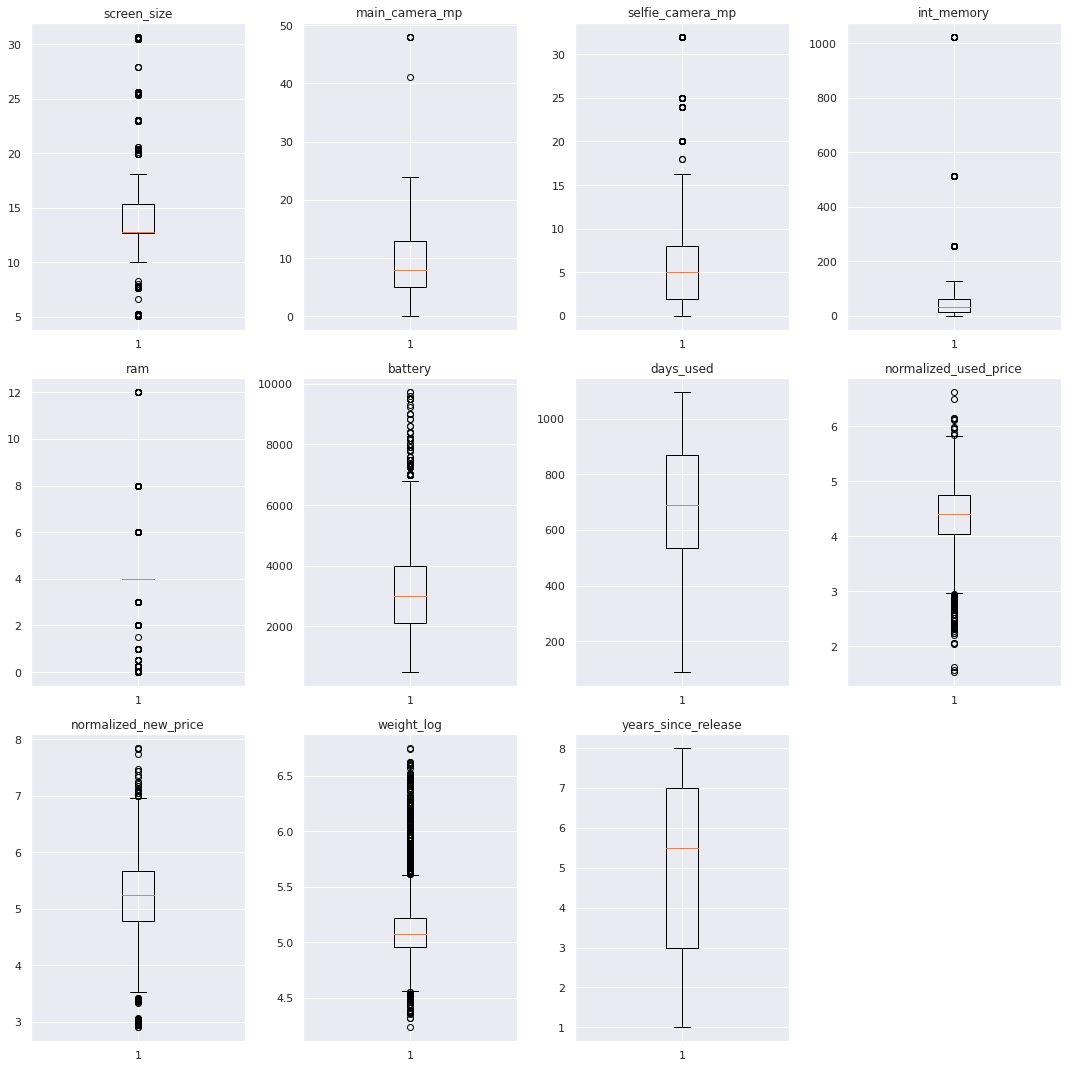

In [849]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### **Outlier Treament**

In [850]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [851]:
# list of columns to treat for outliers
treat_out_cols = ["weight_log", "normalized_new_price", "battery", 
                  "int_memory", "selfie_camera_mp", "main_camera_mp", "screen_size"] 

 We will not treat outliers in the ram column as doing so will remove the variation in the column and most likely make it a constant, which is not desirable, and so it is omitted in the list of columns to treat.

In [852]:
# create a new data frame after treating outliers in the colums
df2 = treat_outliers_all(df1, treat_out_cols)

**Re-check columns to see if outliers were treated**

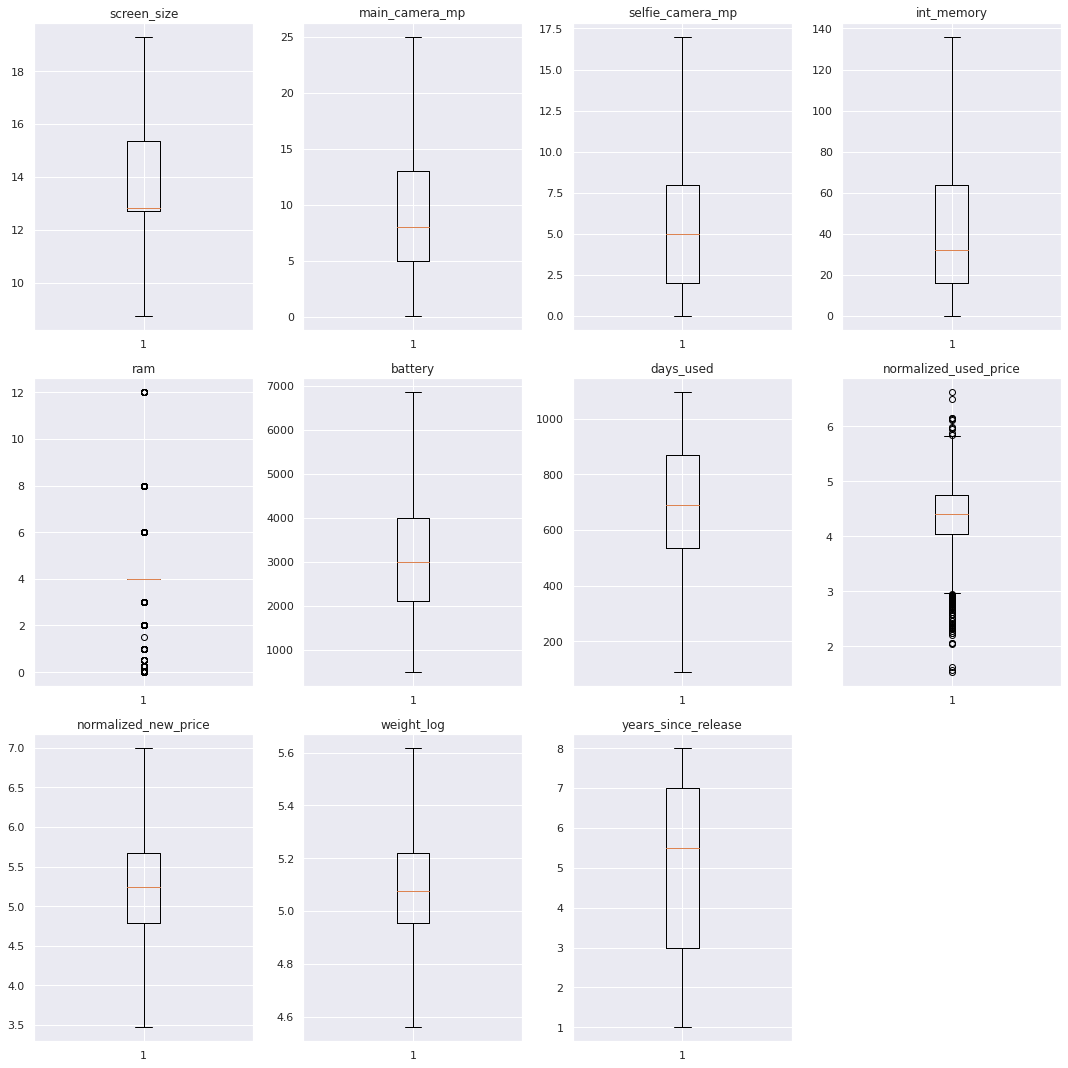

In [853]:
# outlier detection using boxplot
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

*   All outliers in the independent columns were treated apart from the ram column

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [854]:
# check the statistical summary once again
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.551595,2.807499,8.74,12.7,12.83,15.34,19.3
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.586329,4.572418,0.08,5.0,8.0,13.0,25.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,5.96242,5.345927,0.0,2.0,5.0,8.0,17.0
int_memory,3454.0,NaN,NaN,NaN,44.694079,39.079988,0.01,16.0,32.0,64.0,136.0
ram,3454.0,NaN,NaN,NaN,4.03262,1.368598,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3109.100898,1212.793754,500.0,2100.0,3000.0,4000.0,6850.0


In [855]:
# check df2 has no missing values as required
df2.isnull().sum().sum()

0

In [856]:
# take a look at how df2 data looks like now
df2.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_used_price,normalized_new_price,weight_log,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,127,4.307572,4.715100,4.983607,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,325,5.162097,5.519018,5.361292,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,162,5.111084,5.884631,5.361292,1
3,Honor,Android,19.30,yes,yes,13.0,8.0,64.0,6.0,6850.0,345,5.135387,5.630961,5.617149,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,293,4.389995,4.947837,5.220356,1


In [857]:
df2["brand_name"].nunique()

34

*   This column has very many categories(34) which means after creating dummies, very many columns will be formed
*   This information in the brand name column can be grouped int os which column we already have and with fewer unique values
*   Hence, let us go ahead and drop it

In [858]:
df2.drop(["brand_name"], axis=1, inplace=True) # drop brand_name column
df2.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_used_price,normalized_new_price,weight_log,years_since_release
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,127,4.307572,4.715100,4.983607,1
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,325,5.162097,5.519018,5.361292,1
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,162,5.111084,5.884631,5.361292,1
3,Android,19.30,yes,yes,13.0,8.0,64.0,6.0,6850.0,345,5.135387,5.630961,5.617149,1
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,293,4.389995,4.947837,5.220356,1


In [859]:
df2.dtypes

os                        object
screen_size              float64
4g                        object
5g                        object
main_camera_mp           float64
selfie_camera_mp         float64
int_memory               float64
ram                      float64
battery                  float64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
weight_log               float64
years_since_release        int64
dtype: object

# Data preparation for modeling

In [860]:
# define dependent and independent variables
X = df2.drop(["normalized_used_price"], axis=1)
y = df2["normalized_used_price"]

print(X.head())
print()
print(y.head())

        os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android        14.50  yes   no            13.0               5.0   
1  Android        17.30  yes  yes            13.0              16.0   
2  Android        16.69  yes  yes            13.0               8.0   
3  Android        19.30  yes  yes            13.0               8.0   
4  Android        15.32  yes   no            13.0               8.0   

   int_memory  ram  battery  days_used  normalized_new_price  weight_log  \
0        64.0  3.0   3020.0        127              4.715100    4.983607   
1       128.0  8.0   4300.0        325              5.519018    5.361292   
2       128.0  8.0   4200.0        162              5.884631    5.361292   
3        64.0  6.0   6850.0        345              5.630961    5.617149   
4        64.0  3.0   5000.0        293              4.947837    5.220356   

   years_since_release  
0                    1  
1                    1  
2                    1  
3               

In [861]:
# let's add the intercept to data
X = sm.add_constant(X)

In [862]:
# creating dummy variables

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_new_price,weight_log,years_since_release,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,127.0,4.715100,4.983607,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,325.0,5.519018,5.361292,1.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,162.0,5.884631,5.361292,1.0,0.0,0.0,0.0,1.0,1.0
3,1.0,19.30,13.0,8.0,64.0,6.0,6850.0,345.0,5.630961,5.617149,1.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,293.0,4.947837,5.220356,1.0,0.0,0.0,0.0,1.0,0.0


In [863]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [864]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [865]:
# fitting a linear model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     812.6
Date:                   Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                           18:36:00   Log-Likelihood:                 52.372
No. Observations:                   2417   AIC:                            -72.74
Df Residuals:                       2401   BIC:                             19.90
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

#### Observations:

*   Adjusted R-Squared is equal 0.834, which is good
*   The y-intercept is equal to the value of the constantcoeffiecient which is -0.0729.
*   The coefficients of the different predictor variables is well listed in the model summary for example;
    The coefficient of normalized_new_price is equal to 0.4116.

## Model Performance Check

*   Let us check the performance of our initial model

In [866]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [867]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236784,0.183228,0.835434,0.834337,4.414471


In [868]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.243144,0.18733,0.83609,0.833518,4.577868


*  The training R-squared 
 is 0.835, so the model is not underfitting.

*  The train and test RMSE and MAE are comparable, so the model is not overfitting either.

*  MAE suggests that the model can predict the price of a used device within a mean error of 0.187 on the test data.

*  MAPE of 4.58 on the test data means that we are able to predict within 4.6% of the used device prices.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**1. Test for multicollinaerity**


*  This predictor variables in the regression model should not be correlated, hence no multicollinearity.

In [869]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [870]:
checking_vif(x_train)

,feature,VIF
0,const,1227.232818
1,screen_size,5.020059
2,main_camera_mp,2.130616
3,selfie_camera_mp,3.613245
4,int_memory,2.149691
5,ram,2.061785
6,battery,3.511445
7,days_used,2.579919
8,normalized_new_price,2.795831
9,weight_log,4.297022


*   If VIF is between 1 and 5, then there is low multicollinearity.
*   If VIF is between 5 and 10, we say there is moderate multicollinearity.
*   If VIF is exceeding 10, it shows signs of high multicollinearity.

**Therefore:** screen_size and years_since_release show moderate collinearity Let us go ahead and treat the multicollinearity

In [871]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [872]:
col_list = [
    "screen_size",
    "years_since_release"
]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,years_since_release,0.834071,0.237812
1,screen_size,0.826593,0.243112


In [873]:
col_to_drop = "years_since_release"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  years_since_release


,feature,VIF
0,const,1227.210923
1,screen_size,4.947946
2,main_camera_mp,2.120467
3,selfie_camera_mp,3.104717
4,int_memory,2.104077
5,ram,2.057198
6,battery,3.436401
7,days_used,1.857689
8,normalized_new_price,2.488419
9,weight_log,4.283882


*   Dropping years_since_release has brought the VIF of screen_size below 5.
*   Hence the above predictors have no multicollinearity and the assumption is satisfied
*   Let us check the model summary again

In [874]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     868.5
Date:                   Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                           18:36:01   Log-Likelihood:                 49.427
No. Observations:                   2417   AIC:                            -68.85
Df Residuals:                       2402   BIC:                             18.00
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

*   We can see that adj. R-squared has not changed at all, which shows that the dropped column did not have much effect on the model.
*   As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

**Dropping high p-value variables**

*   const, battery, days_used, os_Windows, os_iOS and 5g_yes have p-value > 0.05. So, they are not significant and we'll drop them all one at a time except the constant.

In [875]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'normalized_new_price', 'weight_log', 'os_Others', '4g_yes']


In [876]:
x_train3 = x_train2[["const"] + selected_features]
x_test3 = x_test2[["const"] + selected_features]

In [877]:
# print model summary
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     1350.
Date:                   Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                           18:36:01   Log-Likelihood:                 46.606
No. Observations:                   2417   AIC:                            -73.21
Df Residuals:                       2407   BIC:                            -15.31
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

#### Observations:

*   Now adjusted R-squared is 0.834, i.e., our model is able to explain ~83% of the variance. This shows that the model is good.
*   The adjusted R-squared in olsmodel (where we considered all the variables) was 0.834. This shows that the variables we dropped were not affecting the model much.

 **2. TEST FOR LINEARITY AND INDEPENDENCE**

In [878]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.800785,0.286703
1525,4.448399,4.671627,-0.223227
1128,4.315353,4.312365,0.002987
3003,4.282068,4.203344,0.078724
2907,4.456438,4.494569,-0.038130


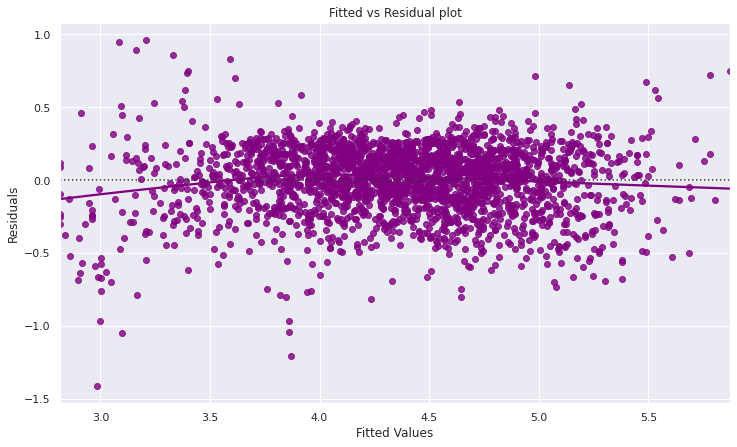

In [879]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

*   The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).
*   There is no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

**3. TEST FOR NORMALITY**

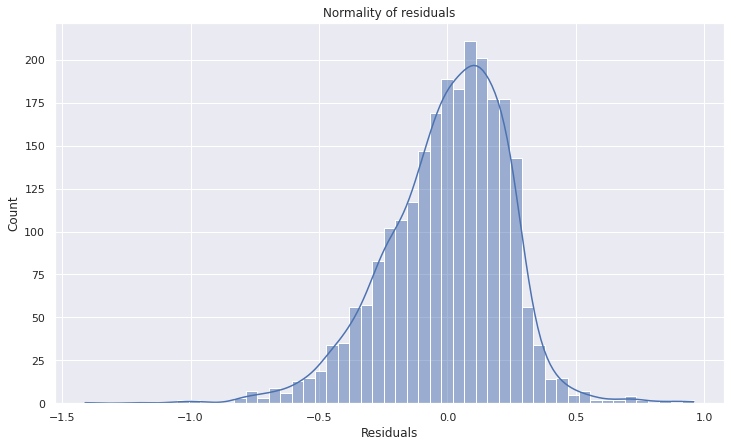

In [880]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

*   The histogram of residuals does have a bell shape.
*   Let's check the Q-Q plot.

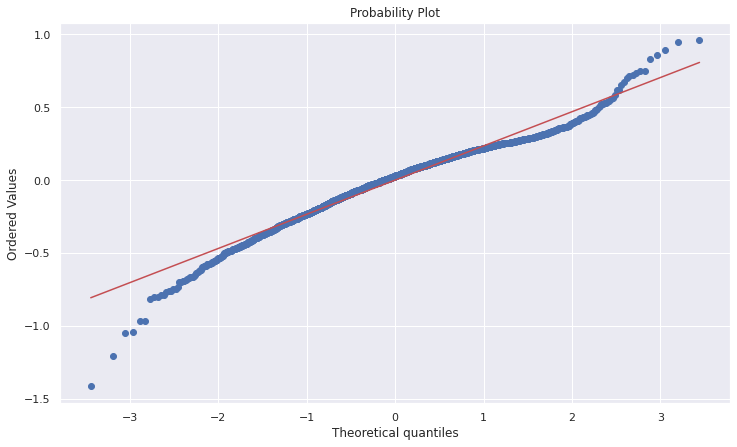

In [881]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

*   The residuals more or less follow a straight line except for the tails.
*   Let's us see the results of the Shapiro-Wilk test.

In [882]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9711180329322815, pvalue=1.1404088285366056e-21)

*   Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
*   Strictly speaking, the residuals are not normal.
*   However, as an approximation, we can accept this distribution as close to being normal.
*   So, the assumption is satisfied.

**4. TEST FOR HOMOSCEDASTICITY**

In [883]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0389346080820279), ('p-value', 0.25430348625524557)]

#### Observations:

*   Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [884]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.396767
2341,3.696103,3.946634
1913,3.592093,3.715304
688,4.306495,4.143544
650,4.522115,5.126232
2291,4.259294,4.404316
40,4.997685,5.291358
1884,3.875359,4.070102
2538,4.206631,3.980933
45,5.380450,5.387768




*   We can observe that our model has shown pretty good prediction results.


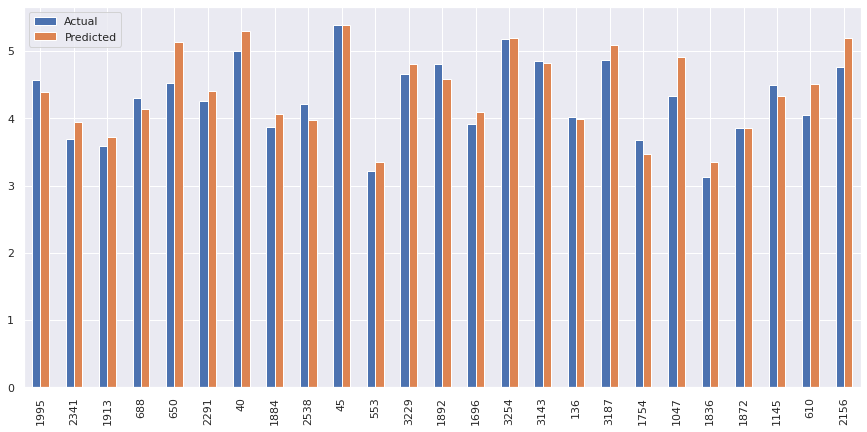

In [885]:
df3 = df_pred_test.sample(25, random_state=1)
df3.plot(kind="bar", figsize=(15, 7))
plt.show()

## Final Model

In [886]:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     1350.
Date:                   Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                           18:36:04   Log-Likelihood:                 46.606
No. Observations:                   2417   AIC:                            -73.21
Df Residuals:                       2407   BIC:                            -15.31
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [887]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmodel_final, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23735,0.183576,0.834647,0.83396,4.424958


In [888]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmodel_final, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.244273,0.188165,0.834565,0.832952,4.607551


#### Obsrvations:


*   The model explains about 83% of the variation in data.
*   The MAPE (Mean Absolute Percentage Error) tells us that we can predict the used devices prices within 4.6% error rate, which is good as it is less error range.
*   The train and test Mean Absolute Error and Root Mean Square Error are comparable which shows that the model is not over-fitting.
*   We can say that the model is good for inference purpose.

## Actionable Insights and Recommendations 

**Insights**
- There are values which have positive coefficient, means when the value increases in the column the value of final output increases as well.
- screen_size, main_camera_mp, selfie_camera_mp, int_memory, ram, normalized_new_price, weight_log ,4G are such values which when increase the value of refurbished phones increases too.
- normalised new price has strong positive correlation with the used price. This shows us that the new prices of refursbished phones will be high if the old price was high.
- Operating system of phones other than Android, iOS and google have negative correlation with the price of phones. Which means that as they increase the price of phone decreases.

In summary therefore, the factors that significantly influence the price of refurbished devices in the market are as listed as below; 
- Price of the similar new device 
- Whether the device is a 4G or not 
- Main camera mega pixels 
- selfie camera pixels 
- weight of the devices 
- Size of the screen of the devices 
- internal memory 
- Operating system
- RAM of the devices 






**Key Takeaway**

Since retailers usually run checks repair used phones to meet a certain standard in the refurbished market, factors like number of days the device has been used, battery and years since release of the device do not show significant impact on the price of the refurbished device, hence Recell should not worry about those factors a lot. As long as the device is repaired, it will get market.